#import libararies & installation

In [ ]:
pip install allensdk # library for brain science

In [ ]:
from allensdk.core.cell_types_cache import CellTypesCache

# Create a new CellTypesCache object with a clean manifest
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# Optionally clear the cache directory to ensure fresh download
import shutil
shutil.rmtree('cell_types')
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

cell_specimen_id = 464212183
data_set = ctc.get_ephys_data(cell_specimen_id)


2024-06-20 19:29:54,821 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491202878
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491202878


Take a smple of the data

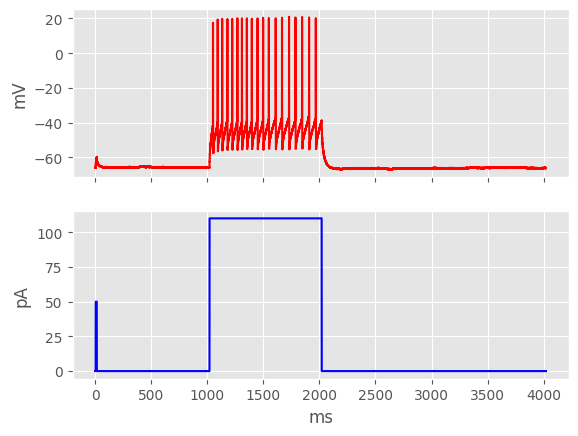

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

sweep_number = 30
sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1] + 1] # in A
v = sweep_data["response"][0:index_range[1] + 1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)
t *= 1000 # to ms

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex = True)
axes[0].plot(t, v, color = 'red')
axes[1].plot(t, i, color = 'blue')
axes[0].set_ylabel("mV")
axes[1].set_ylabel("pA")
axes[1].set_xlabel("ms")
plt.show()

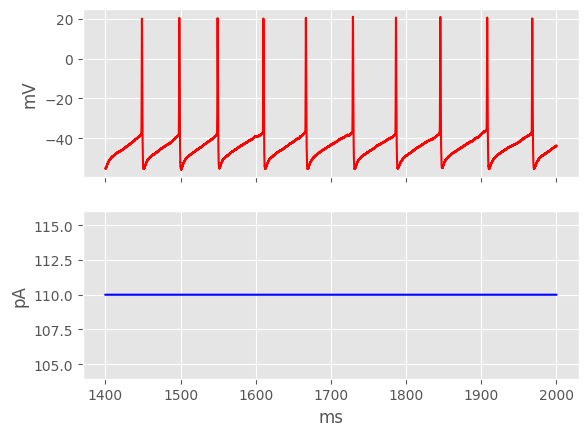

In [ ]:
mask = (t>= 1400) & (t <= 2000) #Time range
t = t[mask]
v = v[mask]
i = i[mask]
#pa is unit for electriaal wave brain
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex = True)
axes[0].plot(t, v, color = 'red')
axes[1].plot(t, i, color = 'blue')
axes[0].set_ylabel("mV")
axes[1].set_ylabel("pA")
axes[1].set_xlabel("ms")
plt.show()

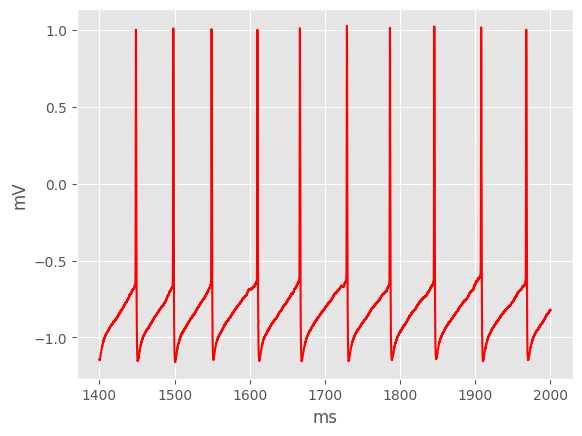

In [ ]:
#voltage of the brain
downsample_indices = np.arange(0, len(v), 6)
v_d = v[downsample_indices]
t_d = t[downsample_indices]

v_min = -50
v_max = 20

v_d = 2 * (v_d - v_min) / (v_max - v_min) - 1

plt.style.use('ggplot')
plt.plot(t_d, v_d, color = 'red')
plt.ylabel("mV")
plt.xlabel("ms")
plt.show()

###first equation  


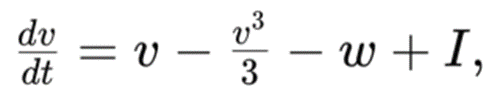

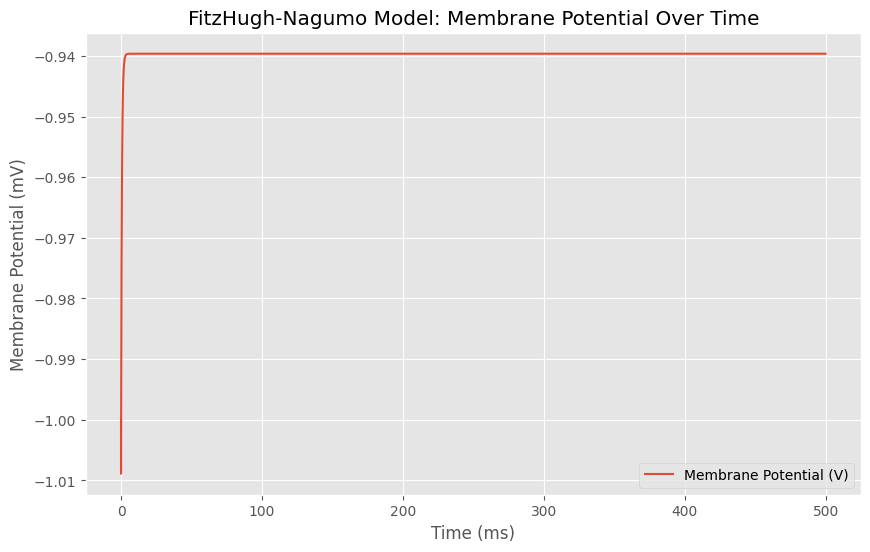

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 0.3
b = 0.9
epsilon = 0.07
I = 0.11
t_max = 500
dt = 0.01  # Time step
time = np.arange(0, t_max, dt)

# Initialize arrays to store results
V = np.zeros(len(time))
W = np.zeros(len(time))

# Initial conditions
V[0] = -1.0
W[0] = 1.0

# Simulate dv/dt = v - v^3/3 - w + I
for i in range(1, len(time)):
    dV = dt * (V[i - 1] - (V[i - 1]**3) - W[i - 1] + I)
    V[i] = V[i - 1] + dV

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (V)')
plt.title('FitzHugh-Nagumo Model: Membrane Potential Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import plotly.express as px

# Define parameters
a = 0.3
b = 0.9
epsilon = 0.07
I = 0.11
t_max = 500
dt = 0.01  # Time step
time = np.arange(0, t_max, dt)

# Initialize arrays to store results
V = np.zeros(len(time))
W = np.zeros(len(time))

# Initial conditions
V[0] = -1.0
W[0] = 99.0

# Simulate dv/dt = v - v^3/3 - w + I
for i in range(1, len(time)):
    dV = dt * (V[i - 1] - (V[i - 1]**3) - W[i - 1] + I)
    V[i] = V[i - 1] + dV

# Plot the results using Plotly Express
fig = px.line(x=time, y=V, labels={'x': 'Time (ms)', 'y': 'Membrane Potential (mV)'}, title='FitzHugh-Nagumo Model: Membrane Potential Over Time')
fig.show()


Changing W

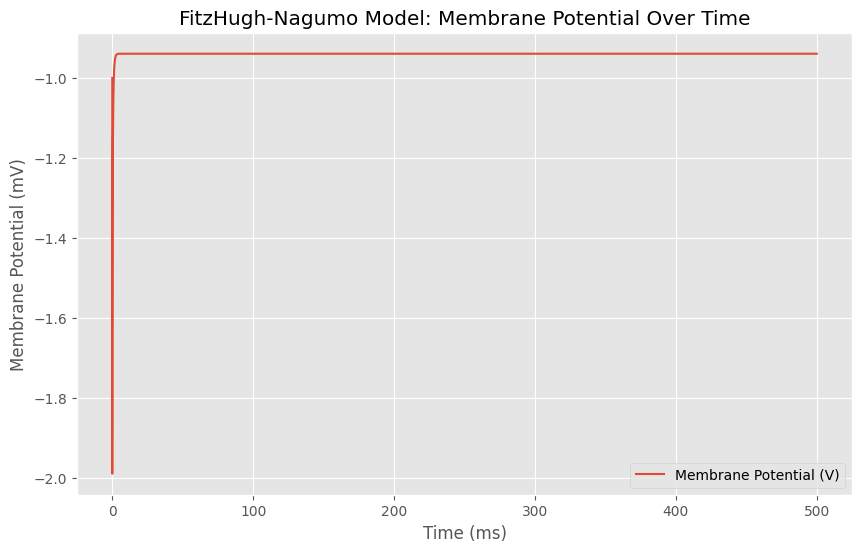

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 0.3
b = 0.9
epsilon = 0.07
I = 0.11
t_max = 500
dt = 0.01  # Time step
time = np.arange(0, t_max, dt)

# Initialize arrays to store results
V = np.zeros(len(time))
W = np.zeros(len(time))

# Initial conditions
V[0] = -1.0
W[0] = 99.0

# Simulate dv/dt = v - v^3/3 - w + I
for i in range(1, len(time)):
    dV = dt * (V[i - 1] - (V[i - 1]**3) - W[i - 1] + I)
    V[i] = V[i - 1] + dV

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (V)')
plt.title('FitzHugh-Nagumo Model: Membrane Potential Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()

Changing I Parameter

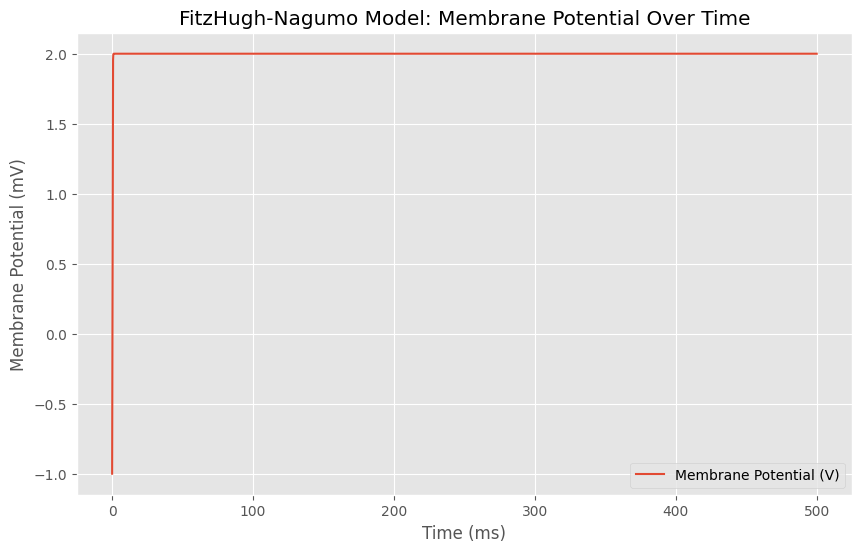

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 0.3
b = 0.9
epsilon = 0.07
I = 6
t_max = 500
dt = 0.01  # Time step
time = np.arange(0, t_max, dt)

# Initialize arrays to store results
V = np.zeros(len(time))
W = np.zeros(len(time))

# Initial conditions
V[0] = -1.0
W[0] = 1.0

# Simulate dv/dt = v - v^3/3 - w + I
for i in range(1, len(time)):
    dV = dt * (V[i - 1] - (V[i - 1]**3) - W[i - 1] + I)
    V[i] = V[i - 1] + dV

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (V)')
plt.title('FitzHugh-Nagumo Model: Membrane Potential Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()

### second equation
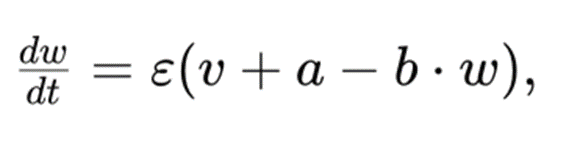

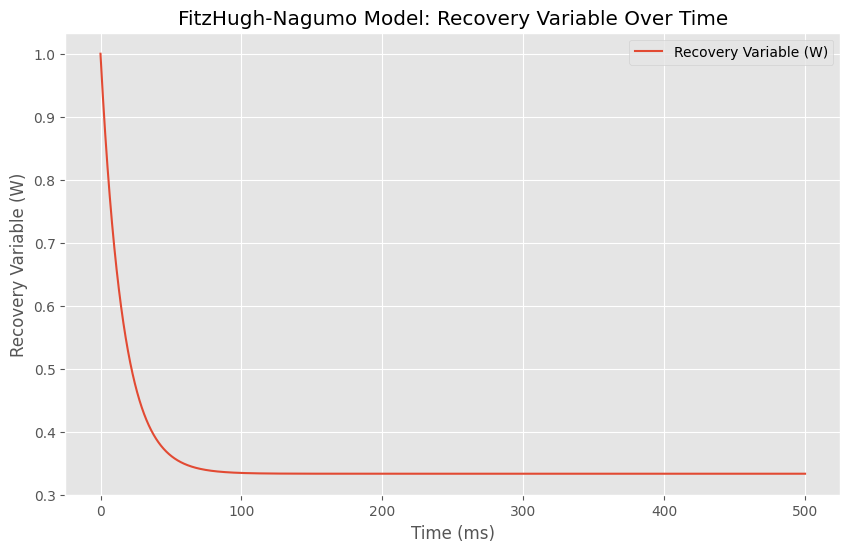

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 0.3
b = 0.9
epsilon = 0.07
I = 0.11
t_max = 500
dt = 0.01  # Time step
time = np.arange(0, t_max, dt)

# Initialize arrays to store results
V = np.zeros(len(time))
W = np.zeros(len(time))

# Initial conditions
V[0] = -1.0
W[0] = 1.0

# Simulate dw/dt = Epsilon(v + a - b*w)
for i in range(1, len(time)):
    dW = dt * (epsilon * (V[i - 1] + a - b * W[i - 1]))
    W[i] = W[i - 1] + dW

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, W, label='Recovery Variable (W)')
plt.title('FitzHugh-Nagumo Model: Recovery Variable Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Recovery Variable (W)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import plotly.express as px

# Define parameters
a = 0.3
b = 0.9
epsilon = 0.07
I = 0.11
t_max = 500
dt = 0.01  # Time step
time = np.arange(0, t_max, dt)

# Initialize arrays to store results
V = np.zeros(len(time))
W = np.zeros(len(time))

# Initial conditions
V[0] = -1.0
W[0] = 1.0

# Simulate dw/dt = epsilon * (v + a - b * w)
for i in range(1, len(time)):
    dW = dt * (epsilon * (V[i - 1] + a - b * W[i - 1]))
    W[i] = W[i - 1] + dW

# Plot the results using Plotly Express
fig = px.line(x=time, y=W, labels={'x': 'Time (ms)', 'y': 'Recovery Variable (W)'}, title='FitzHugh-Nagumo Model: Recovery Variable Over Time')
fig.show()


Changing A Parameter

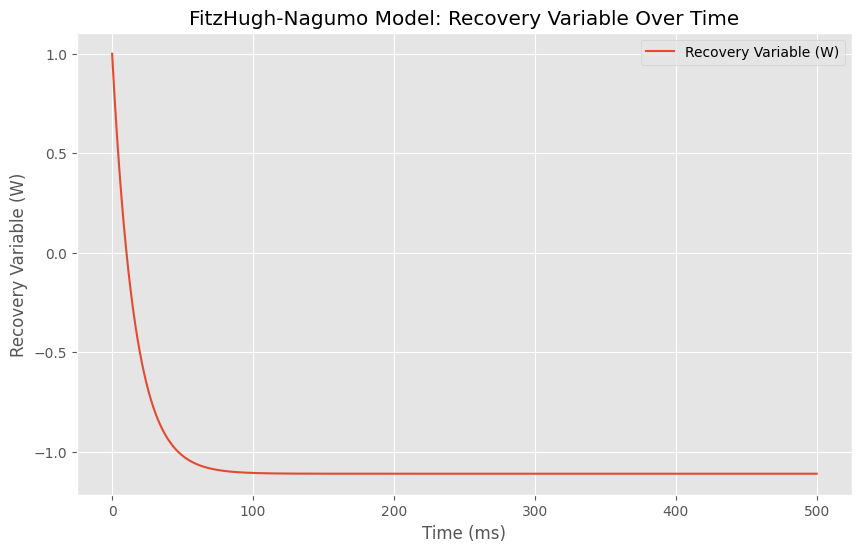

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = -1
b = 0.9
epsilon = 0.07
I = 0.11
t_max = 500
dt = 0.01  # Time step
time = np.arange(0, t_max, dt)

# Initialize arrays to store results
V = np.zeros(len(time))
W = np.zeros(len(time))

# Initial conditions
V[0] = -1.0
W[0] = 1.0

# Simulate dw/dt = Epsilon(v + a - b*w)
for i in range(1, len(time)):
    dW = dt * (epsilon * (V[i - 1] + a - b * W[i - 1]))
    W[i] = W[i - 1] + dW

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, W, label='Recovery Variable (W)')
plt.title('FitzHugh-Nagumo Model: Recovery Variable Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Recovery Variable (W)')
plt.legend()
plt.grid(True)
plt.show()

Changing B Parameter

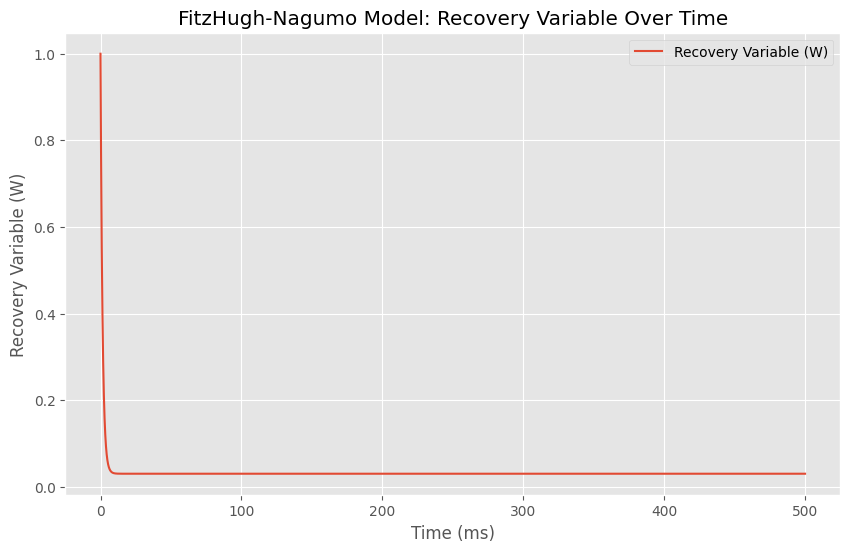

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 0.3
b = 10
epsilon = 0.07
I = 0.11
t_max = 500
dt = 0.01  # Time step
time = np.arange(0, t_max, dt)

# Initialize arrays to store results
V = np.zeros(len(time))
W = np.zeros(len(time))

# Initial conditions
V[0] = -1.0
W[0] = 1.0

# Simulate dw/dt = Epsilon(v + a - b*w)
for i in range(1, len(time)):
    dW = dt * epsilon * (V[i - 1] + a - b * W[i - 1])
    W[i] = W[i - 1] + dW

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, W, label='Recovery Variable (W)')
plt.title('FitzHugh-Nagumo Model: Recovery Variable Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Recovery Variable (W)')
plt.legend()
plt.grid(True)
plt.show()

Changing E Parameter

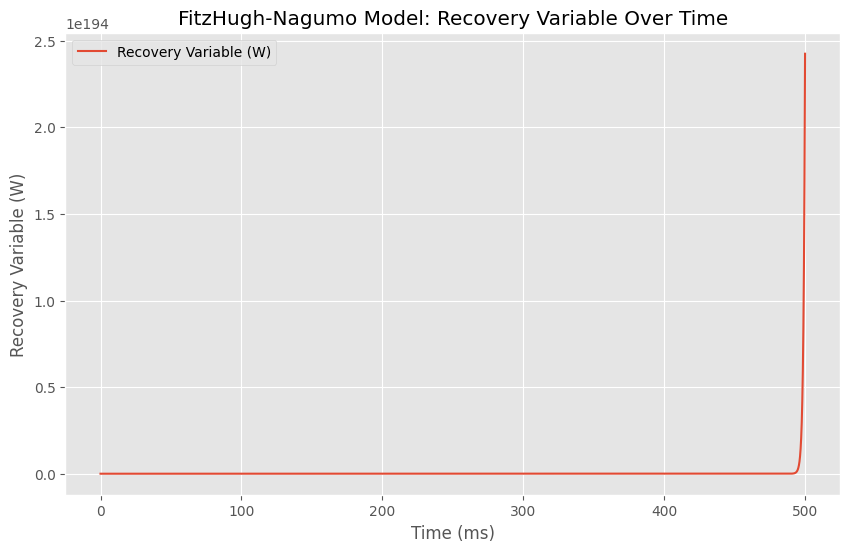

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 0.3
b = 0.9
epsilon = -1
I = 0.11
t_max = 500
dt = 0.01  # Time step
time = np.arange(0, t_max, dt)

# Initialize arrays to store results
V = np.zeros(len(time))
W = np.zeros(len(time))

# Initial conditions
V[0] = -1.0
W[0] = 1.0

# Simulate dw/dt = Epsilon(v + a - b*w)
for i in range(1, len(time)):
    dW = dt * (epsilon * (V[i - 1] + a - b * W[i - 1]))
    W[i] = W[i - 1] + dW

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, W, label='Recovery Variable (W)')
plt.title('FitzHugh-Nagumo Model: Recovery Variable Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Recovery Variable (W)')
plt.legend()
plt.grid(True)
plt.show()

### Second Order Differential
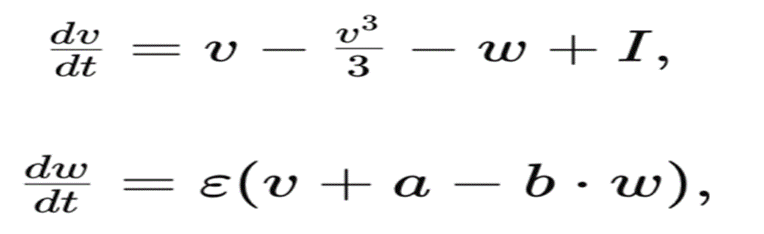

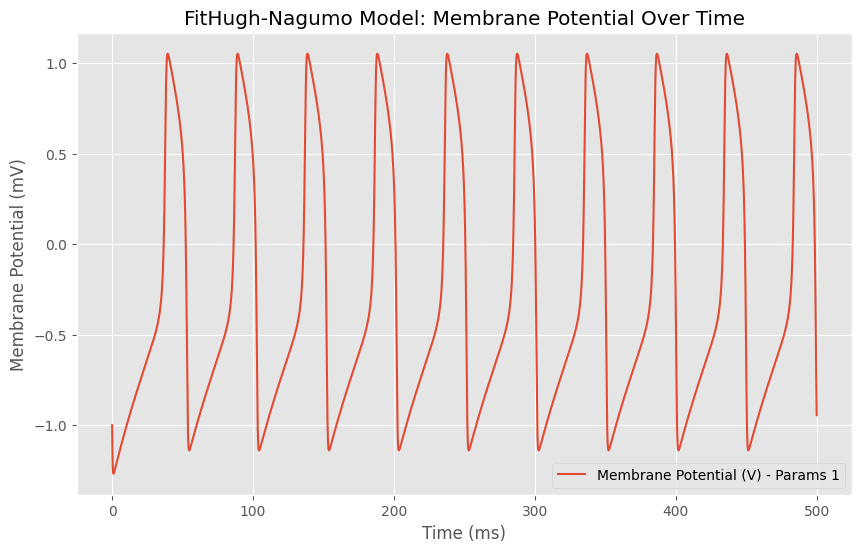

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the first plot
a = 0.3
b = 0.9
epsilon = 0.07
I = 0.11
t_max = 500
dt = 0.0001
time = np.arange(0, t_max, dt)

V = np.zeros(len(time))
W = np.zeros(len(time))

V[0] = -1.0
W[0] = 1.0

for i in range(1, len(time)):
    dV = (dt * (V[i - 1] - (V[i - 1]**3) - W[i - 1] + I)) # dV/dt
    dW = dt * (epsilon * (V[i - 1] + a - b * W[i - 1])) # dW/dt

    V[i] = V[i - 1] + dV
    W[i] = W[i - 1] + dW

# Plot the first figure
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (V) - Params 1')
plt.title('FitHugh-Nagumo Model: Membrane Potential Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

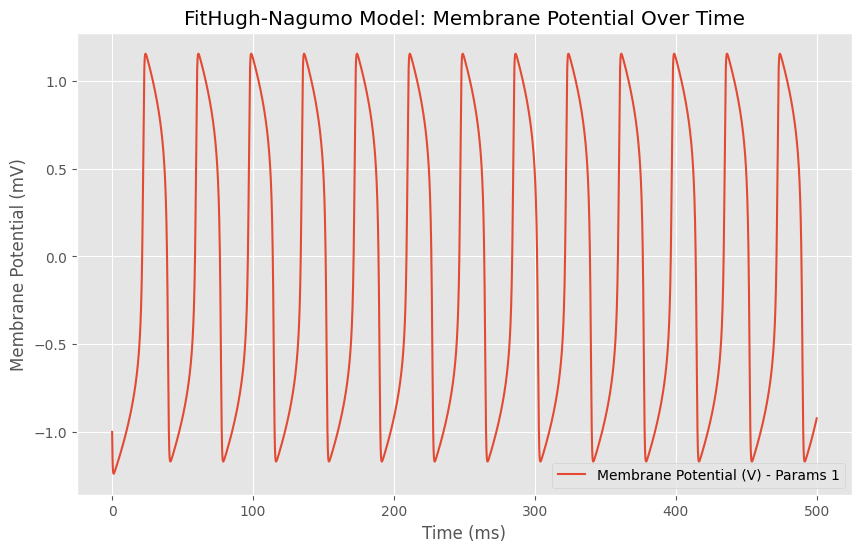

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the first plot
a = 0.08
b = 0.1
epsilon = 0.07
I = 0.25
t_max = 500
dt = 0.0001
time = np.arange(0, t_max, dt)

V = np.zeros(len(time))
W = np.zeros(len(time))

V[0] = -1.0
W[0] = 1.0

for i in range(1, len(time)):
    dV = (dt * (V[i - 1] - (V[i - 1]**3) - W[i - 1] + I)) # dV/dt
    dW = dt * (epsilon * (V[i - 1] + a - b * W[i - 1])) # dW/dt

    V[i] = V[i - 1] + dV
    W[i] = W[i - 1] + dW

# Plot the first figure
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (V) - Params 1')
plt.title('FitHugh-Nagumo Model: Membrane Potential Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

Changing A

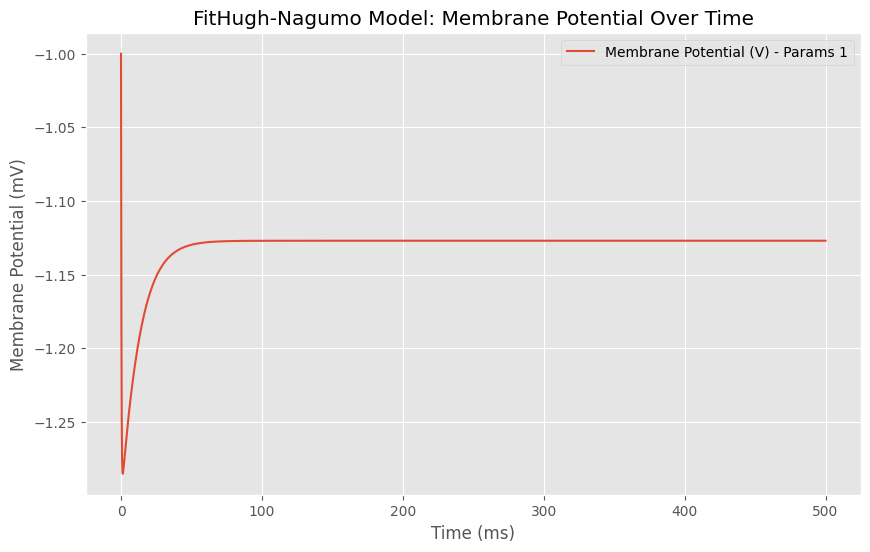

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the first plot
a = 1.5
b = 0.9
epsilon = 0.07
I = 0.11
t_max = 500
dt = 0.0001
time = np.arange(0, t_max, dt)

V = np.zeros(len(time))
W = np.zeros(len(time))

V[0] = -1.0
W[0] = 1.0

for i in range(1, len(time)):
    dV = (dt * (V[i - 1] - (V[i - 1]**3) - W[i - 1] + I)) # dV/dt
    dW = dt * (epsilon * (V[i - 1] + a - b * W[i - 1])) # dW/dt

    V[i] = V[i - 1] + dV
    W[i] = W[i - 1] + dW

# Plot the first figure
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (V) - Params 1')
plt.title('FitHugh-Nagumo Model: Membrane Potential Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

Changing B

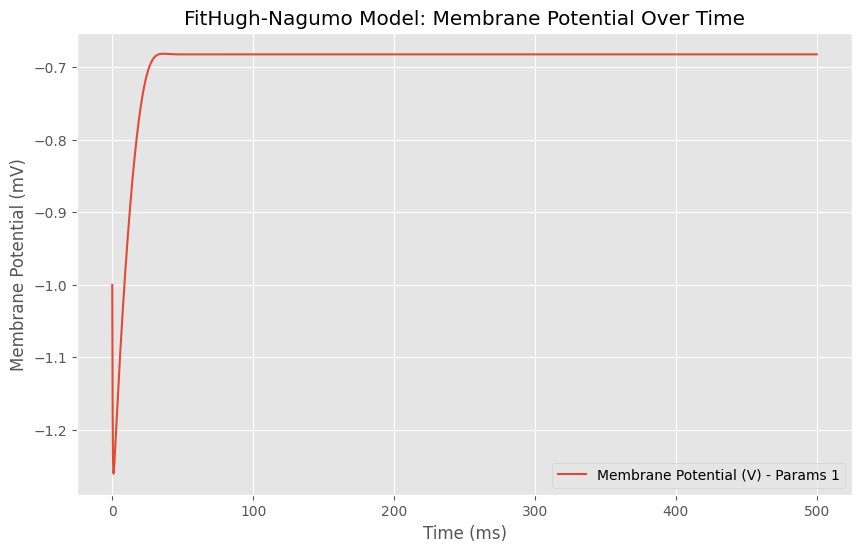

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the first plot
a = 0.3
b = 1.5
epsilon = 0.07
I = 0.11
t_max = 500
dt = 0.0001
time = np.arange(0, t_max, dt)

V = np.zeros(len(time))
W = np.zeros(len(time))

V[0] = -1.0
W[0] = 1.0

for i in range(1, len(time)):
    dV = (dt * (V[i - 1] - (V[i - 1]**3) - W[i - 1] + I)) # dV/dt
    dW = dt * (epsilon * (V[i - 1] + a - b * W[i - 1])) # dW/dt

    V[i] = V[i - 1] + dV
    W[i] = W[i - 1] + dW

# Plot the first figure
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (V) - Params 1')
plt.title('FitHugh-Nagumo Model: Membrane Potential Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

Change E

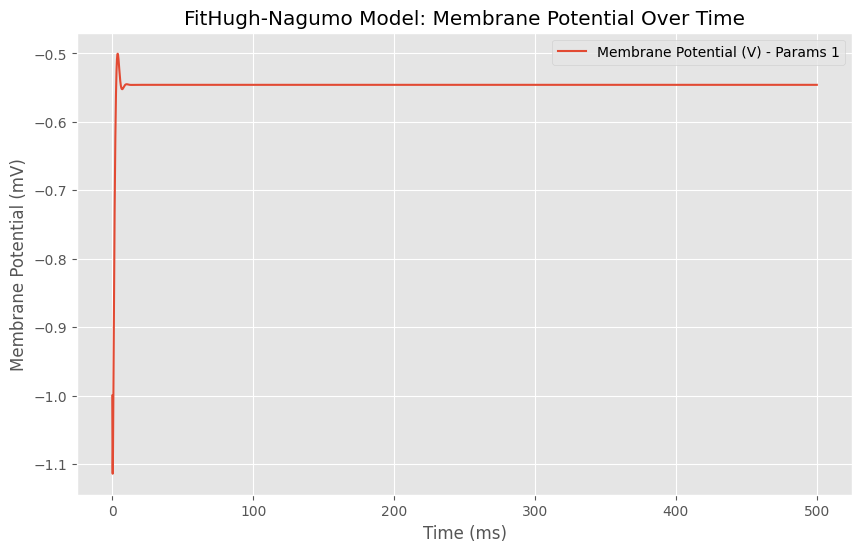

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the first plot
a = 0.3
b = 0.9
epsilon = 1.5
I = 0.11
t_max = 500
dt = 0.0001
time = np.arange(0, t_max, dt)

V = np.zeros(len(time))
W = np.zeros(len(time))

V[0] = -1.0
W[0] = 1.0

for i in range(1, len(time)):
    dV = (dt * (V[i - 1] - (V[i - 1]**3) - W[i - 1] + I)) # dV/dt
    dW = dt * (epsilon * (V[i - 1] + a - b * W[i - 1])) # dW/dt

    V[i] = V[i - 1] + dV
    W[i] = W[i - 1] + dW

# Plot the first figure
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (V) - Params 1')
plt.title('FitHugh-Nagumo Model: Membrane Potential Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

## Simulating

###FitzHughNagumoModel

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

class FitzHughNagumoModel:
  def __init__(self, a, b, epsilon, V0, W0):
    self.a = a
    self.b = b
    self.epsilon = epsilon
    self.I = 0.1
    self.V = V0
    self.W = W0
    self.history = {'V' : [V0], 'W' : [W0]}

  def simulate(self, num_steps, dt):
    for t in range(num_steps):
      dVdt = self.V - (self.V**3) - self.W + self.I
      dWdt = self.epsilon * (self.V + self.a - self.b * self.W)
      self.V += dVdt * dt
      self.W += dWdt * dt

      self.history['V'].append(self.V)
      self.history['W'].append(self.W)


def cost_function(a, b, epsilon, dt, observed_v, observed_t):
  V0 = observed_v[0]
  W0 = 1
  model = FitzHughNagumoModel(a, b, epsilon, V0, W0)

  total_time = observed_t[-1] - observed_t[0]
  num_steps = int(total_time / dt)

  model.simulate(num_steps, dt)

  time_points = np.linspace(observed_t[0], observed_t[-1], num_steps + 1)

  sim_interp = interp1d(time_points, model.history['V'], kind = 'linear',
                        fill_value = 'extrapolate')

  simulated_at_observed = sim_interp(observed_t)

  return np.sum((observed_v - simulated_at_observed) ** 2)

###simulated_anneling

Best Parameters: (0.4107549877886598, 0.4930621950717888, 0.06976434975207355)
Best Cost: 13209.641629406307


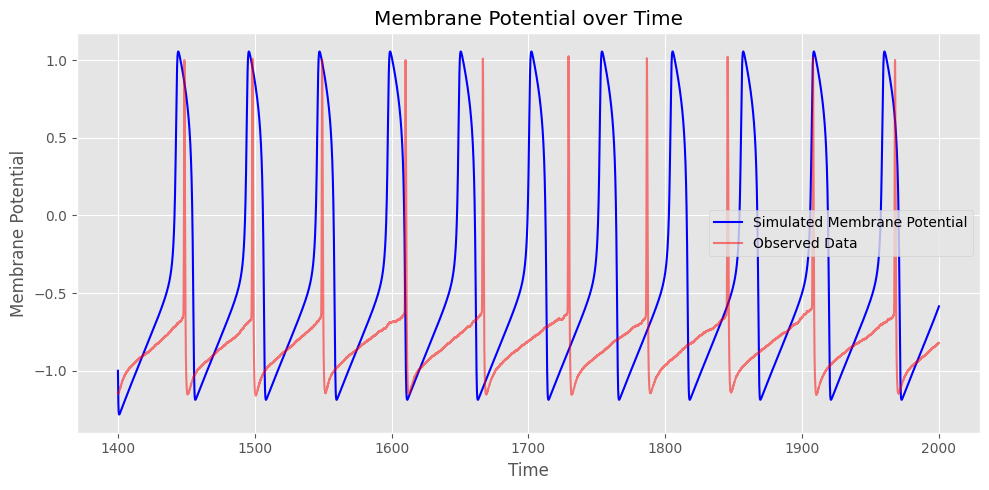

In [ ]:
def simulated_anneling_fitzhugh(observed_v, observed_t, dt):
  best_params = (0.4, 0.5, 0.07)
  best_cost = np.inf
  temp = 175
  temp_min = 0.250
  alpha = 0.500

  while temp > temp_min:
    a_try = best_params[0] + np.random.uniform(-0.01, 0.01)
    b_try = best_params[1] + np.random.uniform(-0.01, 0.01)
    epsilon_try = best_params[2] + np.random.uniform(-0.001, 0.001)

    cost_current = cost_function(best_params[0], best_params[1], best_params[2],
                                 dt, observed_v, observed_t)

    cost_try = cost_function(a_try, b_try, epsilon_try, dt, observed_v,
                             observed_t)

    if cost_try < best_cost or np.random.rand() < np.exp((cost_current - cost_try) / temp):
      best_params = (a_try, b_try, epsilon_try)
      best_cost = cost_try

    temp *= alpha

  return best_params, best_cost

dt = 0.1

best_params, best_cost = simulated_anneling_fitzhugh(v_d, t_d, dt)
print("Best Parameters:", best_params)
print("Best Cost:", best_cost)

a_opt, b_opt, epsilon_opt = best_params

model = FitzHughNagumoModel(a_opt, b_opt, epsilon_opt, -1, 1)

num_steps = int((t_d[-1] - t_d[0]) / dt)

model.simulate(num_steps, dt)

time_points = np.linspace(t_d[0], t_d[-1], num_steps + 1)

plt.figure(figsize = (10, 5))
plt.plot(time_points, model.history['V'], color = 'blue', label = 'Simulated Membrane Potential')
plt.plot(t_d, v_d, color = 'red', label = 'Observed Data', alpha = 0.5)
plt.xlabel("Time")
plt.ylabel("Membrane Potential")
plt.title("Membrane Potential over Time")
plt.legend()

plt.tight_layout()
plt.show()

###gradient descent

Iteration 0: Cost = 1085.867318330465
Iteration 100: Cost = 1030.1903255074042
Iteration 200: Cost = 1030.0438698541145
Iteration 300: Cost = 1029.8761084779471
Iteration 400: Cost = 1029.6819167343533
Iteration 500: Cost = 1029.454396975997
Iteration 600: Cost = 1029.1840558387144
Iteration 700: Cost = 1029.2087151123928
Iteration 800: Cost = 1028.9460722722338
Iteration 900: Cost = 1028.579274371889
Best Parameters: (0.4107549877886598, 0.4930621950717888, 0.06976434975207355)


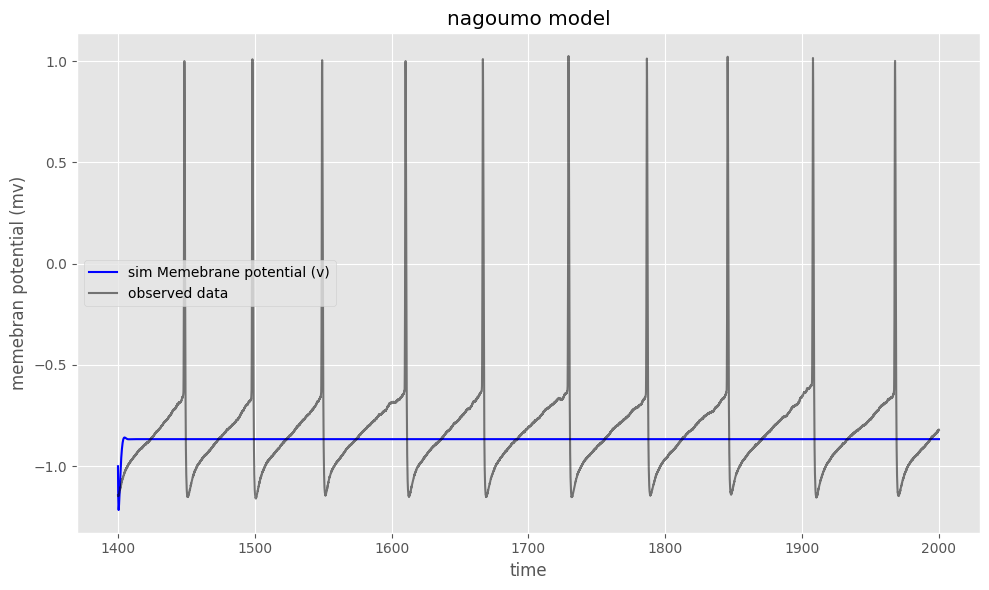

In [ ]:
from scipy.interpolate import interp1d

def cost_function(a, b, epsilon, dt, v, t):
    V0 = v[0]
    W0 = 1
    model = FitzHughNagumoModel(a, b, epsilon, V0, W0)

    total_time = t[-1] - t[0]
    num_steps = int(total_time / dt)
    model.simulate(num_steps, dt)

    time_points = np.linspace(t[0], t[-1], num_steps + 1)

    sim_interp = interp1d(time_points, model.history['V'], kind='linear', fill_value='extrapolate')
    simulate = sim_interp(t)

    return np.sum(np.square(v - simulate))

def numerical_gradient(params, epsilon, dt, v, t):
    grad = np.zeros(len(params))
    for i in range(len(params)):
        params_forward = np.array(params)
        params_forward[i] += epsilon
        grad[i] = (cost_function(params_forward[0], params_forward[1], params_forward[2], dt, v, t) -
                   cost_function(params[0], params[1], params[2], dt, v, t )) / epsilon
    return grad


def gradient_descent(v, t, dt, learning_rate=0.0001, initial_params=[0.8, 0.5, 0.02], epsilon=1e-8, max_iterations=1000):
    params = np.array(initial_params, dtype=np.float64)
    cost_history = []

    for iteration in range(max_iterations):
        grad = numerical_gradient(params, epsilon, dt, v, t)
        params -= learning_rate * grad
        cost = cost_function(params[0], params[1], params[2], dt, v, t)
        cost_history.append(cost)


        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Cost = {cost}")

    return params

dt=0.1
best_prams=gradient_descent(v_d,t_d,dt)
a_best,b_best,epsilon_best=best_prams
print("Best Parameters:", best_params)
model=FitzHughNagumoModel(a_best,b_best,epsilon_best,-1,1)

num_steps=int((t_d[-1]-t_d[0])/dt)

model.simulate(num_steps,dt)

time_points=np.linspace(t_d[0],t_d[-1],num_steps+1)


plt.figure(figsize=(10,6))
plt.plot(time_points,model.history['V'],color='blue',label="sim Memebrane potential (v)")
plt.plot(t_d,v_d,label="observed data",color="black",alpha=0.5)
plt.title('nagoumo model')
plt.xlabel('time')
plt.ylabel("memebran potential (mv)")
plt.legend()
plt.tight_layout()
plt.show()

###Genetic algorithm

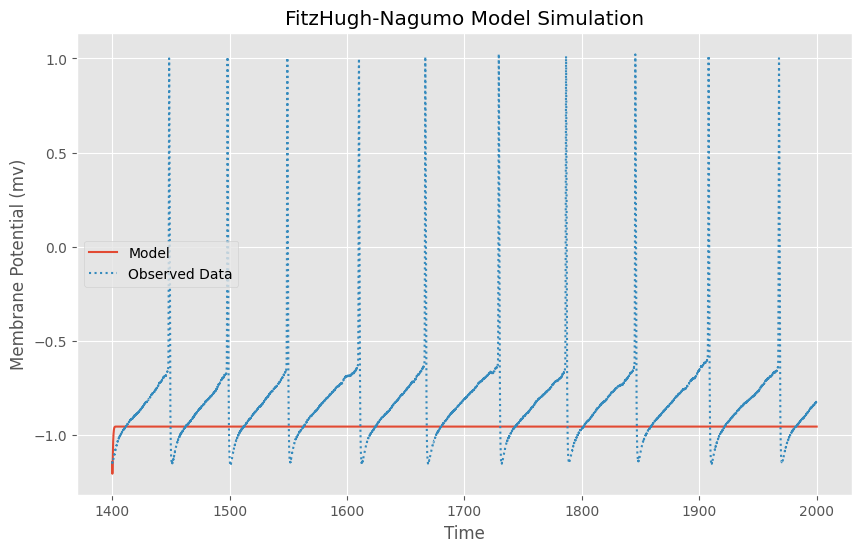

Optimized Parameters: a=1.0, b=3.0, epsilon=1.0


In [ ]:
def fitness_function(a, b, epsilon, v, t):
    mse = cost_function(a, b, epsilon, dt, v, t)
    return -mse  # Negative MSE since we want to maximize fitness

def initialize_population(size, param_bounds):
    num_parameters = len(param_bounds)
    population = np.random.rand(size, num_parameters)
    for i in range(num_parameters):
        population[:, i] = param_bounds[i][0] + population[:, i] * (param_bounds[i][1] - param_bounds[i][0])
    return population

def select_parents(population, fitness, num_parents):
    parents = population[np.argsort(fitness)[-num_parents:]]
    return parents

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, :crossover_point] = parents[parent1_idx, :crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutate(offspring_crossover, param_bounds):
    mutations_strength = 3
    for idx in range(offspring_crossover.shape[0]):
        param_to_mutate = np.random.randint(0, offspring_crossover.shape[1])
        random_value = np.random.uniform(-mutations_strength, mutations_strength)
        offspring_crossover[idx, param_to_mutate] += random_value
        # Ensure mutated parameter remains within bounds
        offspring_crossover[idx, param_to_mutate] = np.clip(offspring_crossover[idx, param_to_mutate], param_bounds[param_to_mutate][0], param_bounds[param_to_mutate][1])
    return offspring_crossover

def GA(v, t, dt, generations=200, population_size=20, num_parents=2, param_bounds=[(1.0, 3.0), (1.0, 3.0), (1.0, 3.0)]):
    population = initialize_population(population_size, param_bounds)
    best_fitness_history = []

    for generation in range(generations):
        fitness = np.array([fitness_function(ind[0], ind[1], ind[2], v, t) for ind in population])
        best_fitness_history.append(np.max(fitness))

        parents = select_parents(population, fitness, num_parents)
        offspring_crossover = crossover(parents, (population_size - parents.shape[0], 3))
        offspring_mutation = mutate(offspring_crossover, param_bounds)

        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = offspring_mutation

    best_fit_idx = np.argmax(fitness)
    best_solution = population[best_fit_idx]

    # Plotting the estimated population against observed data
    p_0 = v[0]
    model = FitzHughNagumoModel(best_solution[0], best_solution[1], best_solution[2], V0=p_0, W0=1)
    num_steps = int((t[-1] - t[0]) / dt)
    model.simulate(num_steps, dt)
    time_points = np.linspace(t[0], t[-1], num_steps + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(time_points, model.history['V'], label='Model')
    plt.plot(t, v, label='Observed Data', linestyle=':')
    plt.xlabel('Time')
    plt.ylabel('Membrane Potential (mv)')
    plt.title('FitzHugh-Nagumo Model Simulation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_solution, best_fitness_history

optimized_params, best_fitness_history = GA(v_d, t_d, dt)
print(f"Optimized Parameters: a={optimized_params[0]}, b={optimized_params[1]}, epsilon={optimized_params[2]}")


#leaky integrate and fire


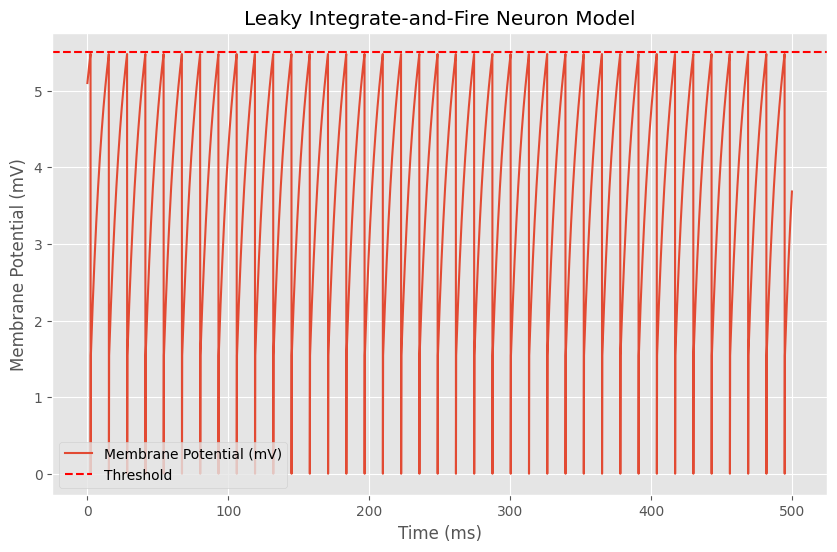

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

V_rest = 5.1
V_reset = 1.5
V_shold = 5.5
R = 1
tm = 10
Input = 1.9
t_max = 500
dt = 0.08
time = np.arange(0, t_max, dt)

V = np.zeros_like(time)
V[0] = V_rest

for i in range(1, len(time)):

    dV = (dt / tm) * ((V_rest - V[i - 1]) + R * Input)
    V[i] = V[i - 1] + dV

    if V[i] >= V_shold:
        V[i - 1] = 0
        V[i] = V_reset

plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire Neuron Model')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.axhline(y=V_shold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.grid(True)
plt.show()
